In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

training_set = training_datagen.flow_from_directory(
    './Dataset/train',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'binary',
    shuffle=False
)
print(training_set.class_indices)

Found 11937 images belonging to 2 classes.
{'normal': 0, 'pneumonia': 1}


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    './Dataset/test',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'binary',
    shuffle=False
)
print(test_set.class_indices)

Found 1505 images belonging to 2 classes.
{'normal': 0, 'pneumonia': 1}


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,600,577 (9.92 MB)

 Trainable params: 2,600,577 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 7)

Epoch 1/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 695s 928ms/step - accuracy: 0.7317 - loss: 0.6502 - val_accuracy: 0.8811 - val_loss: 0.2820
Epoch 2/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 582s 780ms/step - accuracy: 0.8805 - loss: 0.2794 - val_accuracy: 0.8850 - val_loss: 0.2200
Epoch 3/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 593s 794ms/step - accuracy: 0.8837 - loss: 0.2465 - val_accuracy: 0.8831 - val_loss: 0.2124
Epoch 4/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 577s 772ms/step - accuracy: 0.8853 - loss: 0.2358 - val_accuracy: 0.8917 - val_loss: 0.2139
Epoch 5/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 597s 800ms/step - accuracy: 0.8864 - loss: 0.2295 - val_accuracy: 0.8870 - val_loss: 0.2076
Epoch 6/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 602s 806ms/step - accuracy: 0.8882 - loss: 0.2216 - val_accuracy: 0.8850 - val_loss: 0.2027
Epoch 7/7
747/747 ━━━━━━━━━━━━━━━━━━━━ 619s 828ms/step - accuracy: 0.8877 - loss: 0.2187 - val_accuracy: 0.8910 - val_loss: 0.1939


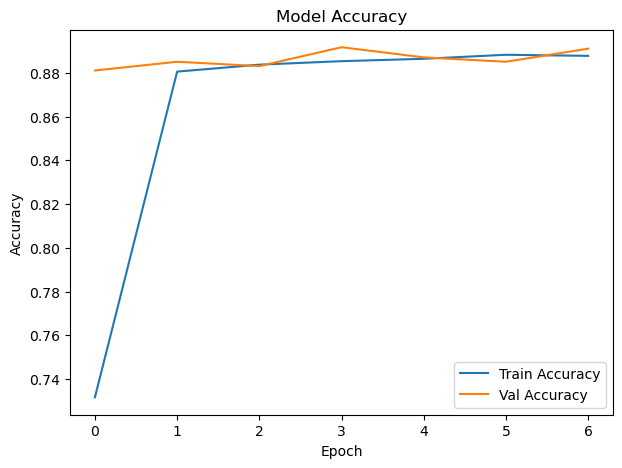

In [15]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

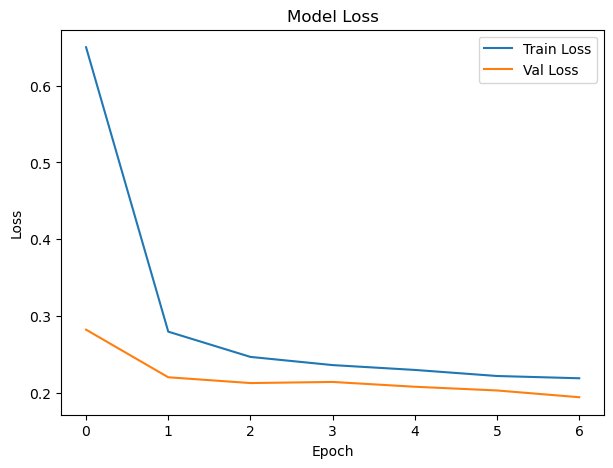

In [16]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
y_pred = cnn.predict(test_set)

95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 449ms/step


95/95 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step


<Axes: >

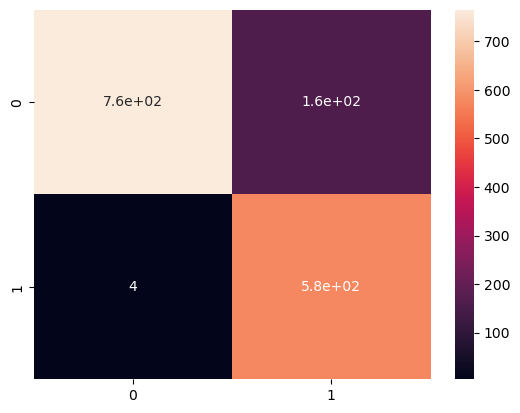

In [18]:
from sklearn.metrics import confusion_matrix
y_true = test_set.classes
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot = True)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       925
           1       0.78      0.99      0.88       580

    accuracy                           0.89      1505
   macro avg       0.89      0.91      0.89      1505
weighted avg       0.91      0.89      0.89      1505



In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred) * 100
print(f"The Accuracy of the model is: {round(accuracy,2)}%")

The Accuracy of the model is: 89.1%


In [21]:
cnn.save('lung.h5')

In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0
